# インクの拡散をシミュレーションしてみよう！

## ライブラリのインポート

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Google Colaboratoryで描画するときに必要
from IPython.display import HTML

## パラメータの設定

### カラーマップの設定

In [2]:
#np.set_printoptions(precision=2, suppress=True)
#cmap = plt.get_cmap('Blues')
#cmap = plt.get_cmap('gist_ncar')
#cmap = plt.get_cmap('coolwarm')
cmap = plt.get_cmap('flag')

### インクの濃さ

In [3]:
inc = 128

### メッシュの密度(行列の設定)

In [4]:
matsize = 33

## アニメーションの下準備

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  


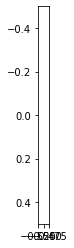

In [5]:
# matplotlibオブジェクトの新規作成
fig, ax = plt.subplots()

# アニメーションフレームを格納する空配列の作成
ims = []

# 画像化したメッシュ（行列）を格納する空二次元配列の作成
im = plt.imshow([[]])

# imsをimに格納する
ims.append([im])

## 拡散を見やすくするための工夫

最初のインクが真ん中の1マスだけに垂らすと拡散が小さくなるので、一回り大きくインクを垂らして拡散を見やすくする

In [6]:
# 空行列の作成
matrix = np.zeros((matsize,matsize))

# 空行列の真ん中にインクを設定
center = (matsize + 1) // 2 - 1

# インクをひとまわり大きくする
for r in range(center - 1, center + 2, 1):
  for c in range(center - 1, center + 2, 1):
    matrix[r][c] = inc

## 拡散の数値計算


In [7]:
start = time.time()

# アニメーションフレームの作成  rangeは総フレーム数
for n in range(1000):
  # 一時的に使うmatrixの新規作成
  tmp_matrix = np.empty((matsize,matsize))
  
  # 初回フレームは計算処理に含めない
  if n > 0:
    # matrix全ての要素で逐次的に拡散の計算を実行
    for i,a in enumerate(matrix):
      for k,v in enumerate(a):
        # 上の値
        up = matrix[i - 1][k] if i > 0 else 0
        # 下の値
        down = matrix[i + 1][k] if i < matsize - 1 else 0
        # 右の値
        right = matrix[i][k - 1] if k > 0 else 0
        # 左の値
        left = matrix[i][k + 1] if k < matsize - 1 else 0
        # 自マスの値
        myself = matrix[i][k]
        # 式
        tmp_matrix[i][k] = ((myself * 4) + up + down + left + right) / 8
    #  全てのmatrixの計算を終えた後、matrixに結果を代入     
    matrix = tmp_matrix
    
    # matrixをアニメーションフレーム化にする
    img = ax.imshow(matrix, cmap=cmap, vmax=inc, vmin=0)
    # Animationフレームをb.に格納する
    ims.append([img])
  else:
    img = ax.imshow(matrix, cmap=cmap, vmax=inc, vmin=0)
    ims.append([img])

end = time.time()
print(end - start)

# pyplotオブジェクトの終了
# 終了しないと余計なオブジェクトが描画させる
plt.close()

6.3128015995025635


## アニメーションの作成

In [8]:
# アニメーションの作成
ani = animation.ArtistAnimation(fig, ims, interval=25)

## Google Colaboratoryでの描画

In [9]:
HTML(ani.to_jshtml())